# Анализ продаж компьютерных игр

**Цель проекта**

Выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Описание данных:**

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

#  Общая информация

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats as st
import seaborn as sns

In [2]:
try:
    df = pd.read_csv('C:/Users/днс/OneDrive/Документы/GitHub/games_datasets/games.csv')
    display('датасет открыт')
except:
    display('ошибка открытия датасета')

'датасет открыт'

In [3]:
df.info()
# общая информация

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


## Предообработка данных

In [5]:
df.columns = df.columns.str.lower()
# приведение название столбцов к нижнему регистру
df.head()
# первые пять сторок датасета

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [6]:
df.duplicated().sum()
# поиск явных дубликатов

0

###  Поиск пропусков

In [7]:
df.isna().sum()
# поиск пропусков

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

**Выводы**

Основные пропуски в оценках 50% от критиков и более в оценках поль зователей.Пропуски в рейтингах, скорее всего связаны с новыми играми, которые не успели получить тот или иной рейтинг.Пропуски в оценках не заполняем, т.к. это субъективное мнение и тут медиана или среднее никак не подойдет.Пропуски в оценках связаны, скорее всего, с непопулярностью игры или выходом новой игры.

### Проверка на дубликаты

In [8]:
df['user_score'].unique()
# проверка на неявные дубликаты

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [9]:
df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [10]:
df['name'].unique()

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], dtype=object)

In [11]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [12]:
df[df['user_score'] == 'tbd']
# срез данных

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


### Изменение данных

In [13]:
 df = df.dropna(subset = ['genre'])
# удаление ненужных строк

In [14]:
df['rating'] = df['rating'].fillna('RP')
# добавление значений
# по классификации ESRB это raiting pending - ожидается присвоение рейтинга

In [15]:
df['user_score'] = df['user_score'].replace('tbd', np.NaN)
# замена значений на NaN

в переводе to be determined(tbd) - пока не определён, поэтому меняем на пустое значение

In [16]:
df['user_score'] = df['user_score'].astype('float64')
# изменение типов данных

In [17]:
df.isna().sum()
# проверка на пропуски

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating                0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16713 non-null  object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


In [19]:
df['total_sales'] = df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
# подсчет продаж во всех регионах

In [20]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,RP,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,RP,31.38


Пропуски в рейтинге поменяли  на RP -  ожидание присвоения рейтинга, изменение типов данных для дальнейшей работы с оценками пользователей.

## Исследовательский анализ данных

In [21]:
df_years = df.groupby('year_of_release')['genre'].count().sort_values(ascending=False).reset_index()
display(df_years.sum(), df_years)
# количество выпущенных игр по годам

year_of_release    73926.0
genre              16444.0
dtype: float64

,year_of_release,genre
0,2008.0,1427
1,2009.0,1426
2,2010.0,1255
3,2007.0,1197
4,2011.0,1136
5,2006.0,1006
6,2005.0,939
7,2002.0,829
8,2003.0,775
9,2004.0,762


In [22]:
df_years = df_years.sort_values(by=['year_of_release'], ascending=False)
display(df_years)

,year_of_release,genre
14,2016.0,502
11,2015.0,606
12,2014.0,581
13,2013.0,544
10,2012.0,653
4,2011.0,1136
2,2010.0,1255
1,2009.0,1426
0,2008.0,1427
3,2007.0,1197


Из таблицы видно, что количество продаж игр была на максимальном уровне в 2006- 2011 гг.

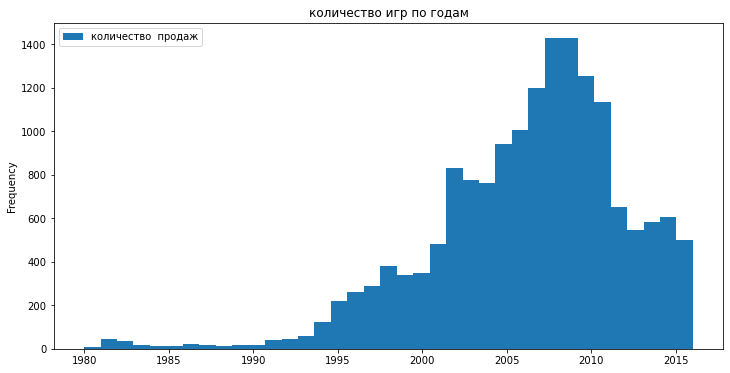

In [23]:
df.plot(kind='hist', y='year_of_release', 
              figsize=(12, 6), bins=37, title='количество игр по годам', label='количество  продаж')
plt.ylabel=('')
plt.show()

График показывает распределение продаж по годам.Видно что максимум в 2008=2009 гг.Потом идет спад с 2010 по 2015 гг.

In [24]:
df_platform = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).reset_index()
display(df_platform)
# группировка платформ по общей выручке и сортировка по убыванию выручки

,platform,total_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12
5,PS,730.86
6,GBA,317.85
7,PS4,314.14
8,PSP,294.05
9,PC,259.52


**Вывод**

За все время продаж игр лидерами стали PS2, X360, PS3.

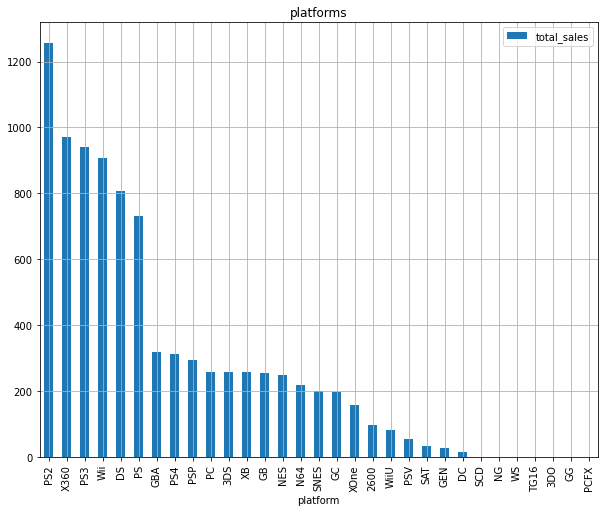

In [25]:
df_platform.plot(kind='bar', x='platform', y='total_sales', grid=True, figsize=(10, 8), title='platforms')
plt.show()
# сторим график по общей выручке среди платформ

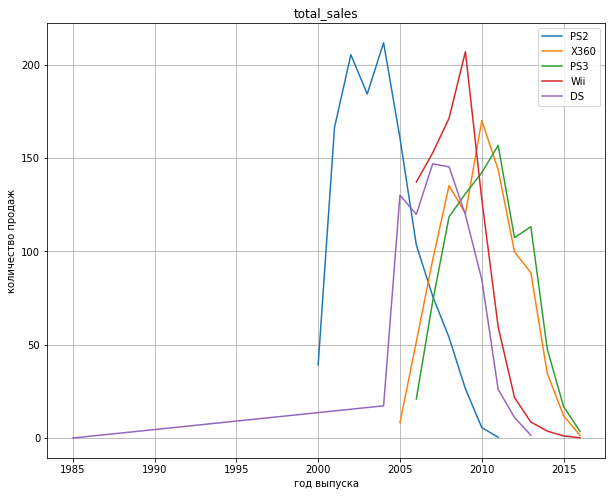

In [26]:
platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS']
for i in platforms:
    (df.query('platform == @i')
    .groupby('year_of_release')['total_sales']
    .sum().plot(label=i, xlabel='год выпуска', ylabel='количество продаж',
                title='total_sales', figsize=(10, 8), grid=True,legend=True))
# строим графики продаж лидеров среди платформ по годам

**Вывод**

На графике продажи игр среди 5 лидеров.Видно что игра до 5 лет набирает объемы продаж, а затем резко снижаются.

In [27]:
df_year_sales = df.groupby(['platform', 'year_of_release'])['total_sales'].sum().sort_values(ascending=False).reset_index()
display(df_year_sales)
# сводная таблица по общей выручке среди платформ и году выпуска

,platform,year_of_release,total_sales
0,PS2,2004.0,211.81
1,Wii,2009.0,206.97
2,PS2,2002.0,205.38
3,PS2,2003.0,184.31
4,Wii,2008.0,171.32
...,...,...,...
233,PC,1988.0,0.03
234,PCFX,1996.0,0.03
235,DC,2007.0,0.02
236,3DO,1994.0,0.02


**Вывод**

Популярные платформы по годам - PS2 в 2004,2002,2003.Wii в 2008 и 2009 гг.

In [28]:
df_year_sales[df_year_sales['year_of_release'] == 2016]
# лидеры среди платформ по продажам в 2016 году

,platform,year_of_release,total_sales
41,PS4,2016.0,69.25
98,XOne,2016.0,26.15
121,3DS,2016.0,15.14
164,PC,2016.0,5.25
170,WiiU,2016.0,4.60
173,PSV,2016.0,4.25
179,PS3,2016.0,3.60
193,X360,2016.0,1.52
221,Wii,2016.0,0.18


**Вывод**

В 2016 году уже лидируют 3 другие платформы(PS4, XOne, 3DS).

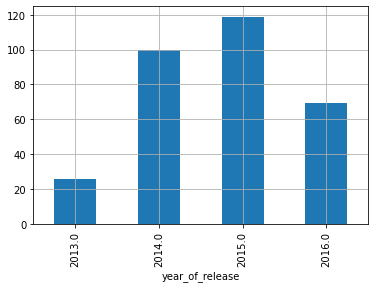

In [29]:
df[df['platform'] == 'PS4'].groupby('year_of_release')['total_sales'].sum().plot(grid=True, kind='bar')
plt.show()

**Выводы**

Видно из гистограммы что платформа PS4 набирала популярность 2 года, а затем спад продаж.Берем срез данных за 2014-2016 гг., т.к. цикл подъем - спад продаж игр примерно 2-3 года исходя из данных.

In [30]:
df_total = df[df['year_of_release'] >= 2014]
df_total.head(15)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,RP,14.63
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014.0,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,RP,11.68
77,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,RP,7.98
92,Call of Duty: Advanced Warfare,PS4,2014.0,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
94,FIFA 17,PS4,2016.0,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
96,Super Smash Bros. for Wii U and 3DS,3DS,2014.0,Fighting,3.27,1.37,2.43,0.48,NaN,NaN,RP,7.55
99,Call of Duty: Black Ops 3,XOne,2015.0,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,RP,7.39
105,Fallout 4,PS4,2015.0,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17


In [31]:
df_total['platform'].unique()
# проверка на количество уникальных платформ

array(['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'X360', 'PC', 'Wii', 'PSV',
       'PSP'], dtype=object)

In [32]:
df_total_platform = df_total.groupby('platform')['total_sales'].sum().sort_values(ascending=False).reset_index()
display(df_total_platform)


,platform,total_sales
0,PS4,288.15
1,XOne,140.36
2,3DS,86.68
3,PS3,68.18
4,X360,48.22
5,WiiU,42.98
6,PC,27.05
7,PSV,22.40
8,Wii,5.07
9,PSP,0.36


**Вывод**

Остались такие же 3 лидера по количеству продаж.

In [33]:
df_total_platform = (df_total
                            .groupby(['platform', 'year_of_release'])['total_sales']
                            .sum()
                            .sort_values(ascending=False).reset_index())
display(df_total_platform)
# продажи среди платформ в 2014-2016 гг.

,platform,year_of_release,total_sales
0,PS4,2015.0,118.90
1,PS4,2014.0,100.00
2,PS4,2016.0,69.25
3,XOne,2015.0,60.14
4,XOne,2014.0,54.07
5,PS3,2014.0,47.76
6,3DS,2014.0,43.76
7,X360,2014.0,34.74
8,3DS,2015.0,27.78
9,XOne,2016.0,26.15


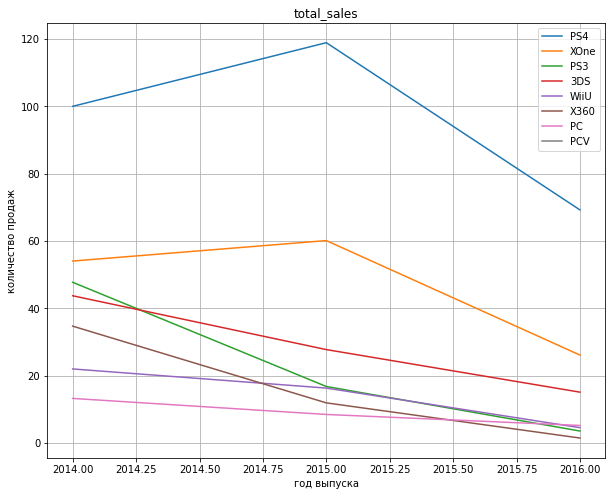

In [34]:
platforms = ['PS4', 'XOne', 'PS3', '3DS', 'WiiU', 'X360', 'PC', 'PCV']
for i in platforms:
    (df_total.query('platform == @i')
    .groupby('year_of_release')['total_sales']
    .sum().plot(label=i, xlabel='год выпуска', ylabel='количество продаж',
                title='total_sales', figsize=(10, 8), grid=True,legend=True))

**Вывод**

Из графиков видно что в 2015 году были максимальные продажи у PS4, XOne.

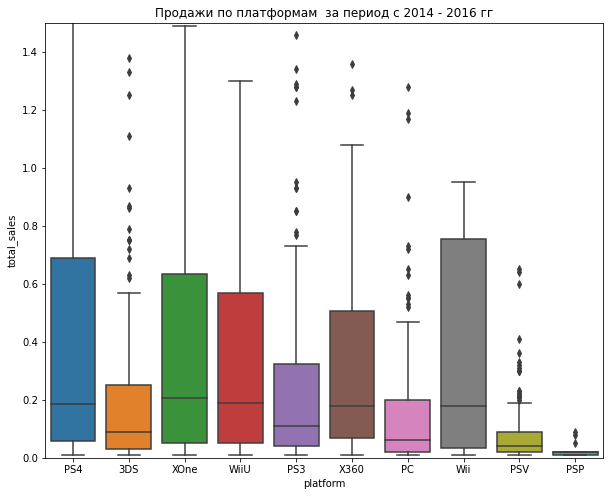

In [35]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df_total, y='total_sales', x='platform').set(label='platform', ylim=(0, 1.5))
plt.title('Продажи по платформам  за период с 2014 - 2016 гг')
plt.show()
# график «ящик с усами» по глобальным продажам игр в разбивке по платформам

**Вывод**

Из графика видно, что медиана по количеству продаж примерно в одном интервале среди 5 платформ(PS4, XOne, WiU, X360, Wii).

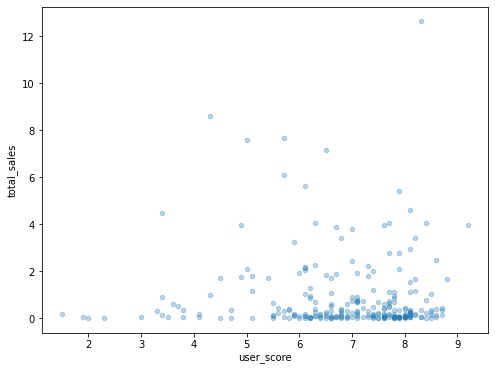

In [36]:
df_total.query('platform == "PS4"').plot(kind='scatter', x='user_score', y='total_sales', figsize=(8, 6),alpha=0.3)
plt.show()
# общие продажи по платформе PS4 в зависимости от оценок пользователей

**Вывод**

Из графика видно что основные продажи игр с оценкой пользователей 5,5-8,5.

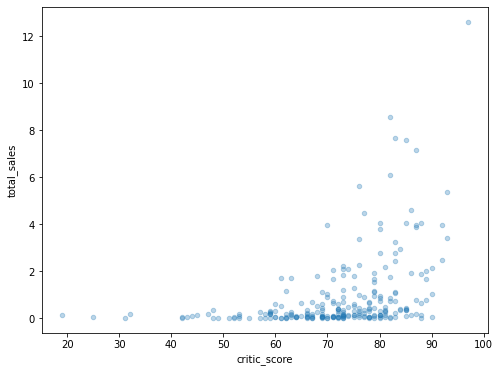

In [37]:
df_total.query('platform == "PS4"').plot(kind='scatter', x='critic_score', y='total_sales', figsize=(8, 6),alpha=0.3)
plt.show()
# общие продажи по платформе PS4 в зависимости от оценок критиков

**Вывод**

Из графика видно что основные продажи игр с оценкой критиков 50-90.

In [38]:
df_total.query('platform == "PS4"')[['total_sales', 'critic_score', 'user_score']].corr()
# считаем корреляцию по платформе PS4 по отзывам критиков и пользователей

,total_sales,critic_score,user_score
total_sales,1.000000,0.402661,-0.040132
critic_score,0.402661,1.000000,0.546434
user_score,-0.040132,0.546434,1.000000


**Вывод**

Так же по корреляции видно, что продажи не зависят от оценок пользователей, а есть зависимость от оценок критиков.

In [39]:
top_platform = df_total.query('platform == ["XOne", "WiiU", "X360", "Wii"]')
display(top_platform)
# срез по лидерам платформ

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
99,Call of Duty: Black Ops 3,XOne,2015.0,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,RP,7.39
110,Mario Kart 8,WiiU,2014.0,Racing,3.15,2.15,1.28,0.51,88.0,9.1,E,7.09
165,Grand Theft Auto V,XOne,2014.0,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
179,Call of Duty: Advanced Warfare,XOne,2014.0,Shooter,3.22,1.55,0.01,0.48,81.0,5.4,M,5.26
216,Super Smash Bros. for Wii U and 3DS,WiiU,2014.0,Fighting,2.60,1.08,0.81,0.38,NaN,NaN,RP,4.87
...,...,...,...,...,...,...,...,...,...,...,...,...
16643,Rugby Challenge 3,XOne,2016.0,Sports,0.00,0.01,0.00,0.00,NaN,6.6,E,0.01
16645,ZombiU,XOne,2016.0,Action,0.00,0.01,0.00,0.00,NaN,NaN,RP,0.01
16652,Fast Racing Neo,WiiU,2016.0,Action,0.00,0.01,0.00,0.00,81.0,8.5,E,0.01
16660,Prison Architect,XOne,2016.0,Action,0.01,0.00,0.00,0.00,74.0,6.7,RP,0.01


In [40]:
top_platform.pivot_table(index='platform', values=['critic_score', 'user_score', 'total_sales'], aggfunc='corr').reset_index()

,platform,level_1,critic_score,total_sales,user_score
0,Wii,user_score,NaN,1.000000,1.000000
1,Wii,total_sales,NaN,1.000000,1.000000
2,WiiU,critic_score,1.000000,0.370201,0.763536
3,WiiU,user_score,0.763536,0.407926,1.000000
4,WiiU,total_sales,0.370201,1.000000,0.407926
5,X360,critic_score,1.000000,0.525723,0.625309
6,X360,user_score,0.625309,-0.138445,1.000000
7,X360,total_sales,0.525723,1.000000,-0.138445
8,XOne,critic_score,1.000000,0.428677,0.440977
9,XOne,user_score,0.440977,-0.070384,1.000000


**Вывод**

По корреляции лидеров среди платформ видно, что продажи не зависят от оценок пользователей у X360, XOne, а есть зависимость от оценок критиков  у WiiU, X360, Xone.

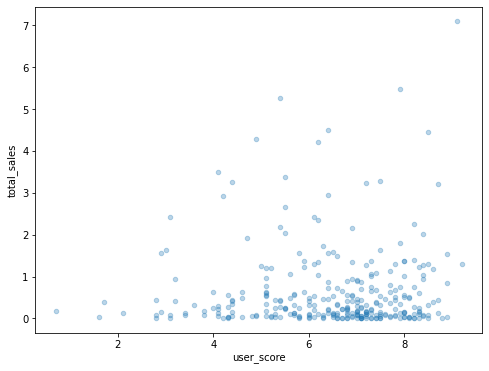

In [41]:
top_platform.plot(kind='scatter', x='user_score', y='total_sales', figsize=(8, 6),alpha=0.3)
plt.show()

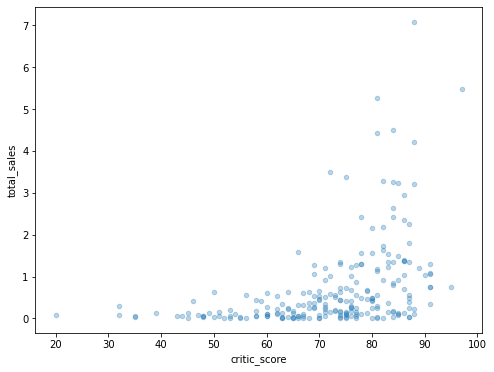

In [42]:
top_platform.plot(kind='scatter', x='critic_score', y='total_sales', figsize=(8, 6),alpha=0.3)
plt.show()

**Вывод**

Распределение продаж среди лидеров по оценкам критиков.Основные продажи находятся в пределах, когда игры имеют оценки 45-90.

In [43]:
df_total_genre = (df_total
                  .groupby('genre')['total_sales']
                  .agg(['median', 'sum'])
                  .sort_values(by='median', ascending=False)
                  .reset_index())
display(df_total_genre)
# продажи по жанрам 

,genre,median,sum
0,Shooter,0.515,170.94
1,Sports,0.180,109.48
2,Platform,0.140,18.09
3,Fighting,0.125,28.22
4,Role-Playing,0.110,101.44
5,Simulation,0.100,13.13
6,Action,0.090,199.36
7,Misc,0.090,37.55
8,Racing,0.090,27.52
9,Strategy,0.060,3.96


**Вывод**

Самые популярные жанры игр , исходя из данных по медиане Shooter, Sports, Platform, Fighting.

## Исследовательский анализ

,platform,na_sales
0,PS4,98.61
1,XOne,81.27
2,X360,28.30
3,3DS,22.64
4,PS3,22.05
5,WiiU,19.36
6,PC,7.23
7,PSV,2.52
8,Wii,2.08
9,PSP,0.00


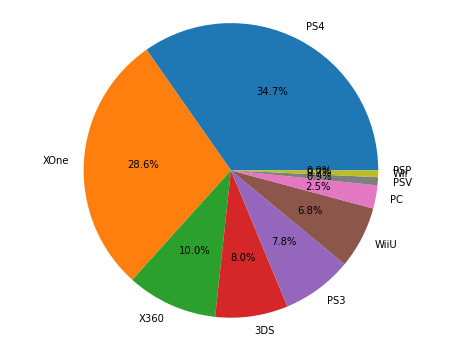

In [44]:
na_platform = (df_total.pivot_table(index='platform', values='na_sales', aggfunc='sum')
                                     .sort_values(by='na_sales', ascending=False).reset_index())
display(na_platform)

fig, ax = plt.subplots(figsize=(8,6))
ax.pie(na_platform.na_sales, labels=na_platform.platform, autopct='%1.1f%%')
ax.axis("equal")
plt.show()
# популярные платформы по регионам

**Вывод**

В американском регионе большая часть игр на двух платформах PS4, Xone.

,platform,eu_sales
0,PS4,130.04
1,XOne,46.25
2,PS3,25.54
3,PC,17.97
4,3DS,16.12
5,X360,15.49
6,WiiU,13.15
7,PSV,3.53
8,Wii,2.59
9,PSP,0.00


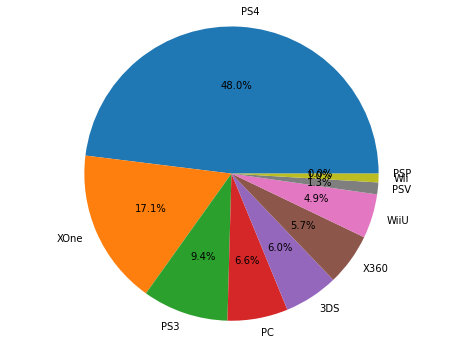

In [45]:
eu_platform = (df_total.pivot_table(index='platform', values='eu_sales', aggfunc='sum')
                                     .sort_values(by='eu_sales', ascending=False).reset_index())
display(eu_platform)
fig, ax = plt.subplots(figsize=(8,6))
ax.pie(eu_platform.eu_sales, labels=eu_platform.platform, autopct='%1.1f%%')
ax.axis("equal")
plt.show()

**Вывод**

В европейском регионе почти 50 % занимает платформа PS4 и 17% XOne.

,platform,jp_sales
0,3DS,44.24
1,PS4,15.02
2,PSV,14.54
3,PS3,11.22
4,WiiU,7.31
5,PSP,0.36
6,XOne,0.32
7,X360,0.08
8,PC,0.00
9,Wii,0.00


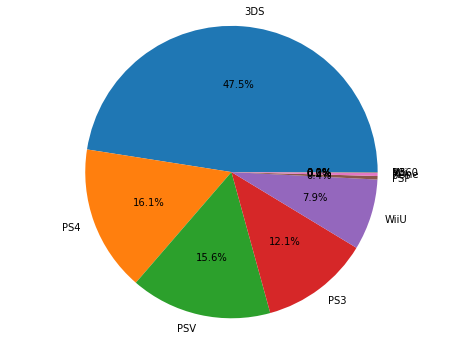

In [46]:
jp_platform = (df_total.pivot_table(index='platform', values='jp_sales', aggfunc='sum')
                                     .sort_values(by='jp_sales', ascending=False).reset_index())
display(jp_platform)
fig, ax = plt.subplots(figsize=(8,6))
ax.pie(jp_platform.jp_sales, labels=jp_platform.platform, autopct='%1.1f%%')
ax.axis("equal")
plt.show()

**Вывод**

В японском регионе лидер среди платформ(почти половина) 3DS и 16,1 всего PS4

In [47]:
na_genre = (df_total.pivot_table(index='genre', values='na_sales', aggfunc='median')
                                     .sort_values(by='na_sales', ascending=False).reset_index())
eu_genre = (df_total.pivot_table(index='genre', values='eu_sales', aggfunc='median')
                                     .sort_values(by='eu_sales', ascending=False).reset_index())
jp_genre = (df_total.pivot_table(index='genre', values='jp_sales', aggfunc='median')
                                     .sort_values(by='jp_sales', ascending=False).reset_index())
display(na_genre, eu_genre, jp_genre)
# популярные жанры по регионам

,genre,na_sales
0,Shooter,0.220
1,Platform,0.075
2,Sports,0.070
3,Fighting,0.040
4,Racing,0.030
5,Role-Playing,0.020
6,Action,0.010
7,Misc,0.010
8,Adventure,0.000
9,Puzzle,0.000


,genre,eu_sales
0,Shooter,0.220
1,Platform,0.055
2,Racing,0.050
3,Sports,0.050
4,Simulation,0.030
5,Action,0.020
6,Fighting,0.020
7,Misc,0.010
8,Role-Playing,0.010
9,Strategy,0.010


,genre,jp_sales
0,Role-Playing,0.05
1,Fighting,0.03
2,Puzzle,0.03
3,Action,0.01
4,Adventure,0.01
5,Misc,0.01
6,Platform,0.00
7,Racing,0.00
8,Shooter,0.00
9,Simulation,0.00


**Вывод**

В американском и европейском регионам лидеры среди жанров Action, Shooter, Sports.В японском регионе лидеры Role-Playing, Action, Fighting.

In [48]:
na_rating = (df_total.pivot_table(index='rating', values='na_sales', aggfunc='sum')
                                     .sort_values(by='na_sales', ascending=False).reset_index())

eu_rating = (df_total.pivot_table(index='rating', values='eu_sales', aggfunc='sum')
                                     .sort_values(by='eu_sales', ascending=False).reset_index())
jp_rating = (df_total.pivot_table(index='rating', values='jp_sales', aggfunc='sum')
                                     .sort_values(by='jp_sales', ascending=False).reset_index())
display(na_rating, eu_rating, jp_rating)
# влияние рейтинга ESRB на продажи в регионах

,rating,na_sales
0,M,96.42
1,RP,64.72
2,E,50.74
3,T,38.95
4,E10+,33.23


,rating,eu_sales
0,M,93.44
1,RP,58.95
2,E,58.06
3,T,34.07
4,E10+,26.16


,rating,jp_sales
0,RP,56.90
1,T,14.78
2,E,8.94
3,M,8.01
4,E10+,4.46


**Вывод** 

В американском и европейском регионам влияет на продажи рейтинг M и без рейтинга.В японском регионе большая часть продаж без рейтинга.Видимо, новые игры больше всего продаются.

## Проверка гипотез

In [49]:
xbox_rating = df_total[df_total['platform'] == 'XOne']['user_score'].notna()
# делаем срез таблицы по платформам XOne

In [50]:
pc_rating = df_total[df_total['platform'] == 'PC']['user_score'].notna()
# делаем срез таблицы по платформам PC

**Нулевая гипотеза - средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Альтернативная гипотеза - средние пользовательские рейтинги платформ Xbox One и PC отличаются**.

In [51]:
alpha = .05 
# критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу
 
results = st.ttest_ind(
    xbox_rating, 
    pc_rating, equal_var = False)
 
display('p-значение:', results.pvalue)
 
if results.pvalue < alpha:
    display("Отвергаем нулевую гипотезу")
else:
    display("Не получилось отвергнуть нулевую гипотезу") 

'p-значение:'

0.05500062389862723

'Не получилось отвергнуть нулевую гипотезу'

**Вывод**

Исходя из теста рейтинги Xbox One и PC одинаковые.

In [52]:
action_rating = df_total[df_total['genre'] == 'Action']['user_score'].notna()
# делаем срез таблицы по жанрам Action

In [53]:
sports_rating = df_total[df_total['genre'] == 'Sports']['user_score'].notna()
# делаем срез таблицы по жанрам Sports

**Нулевая гипотеза - средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые. Альтернативная гипотеза - средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные**.

In [54]:
alpha = .05 
# критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу
 
results = st.ttest_ind(
    action_rating, 
    sports_rating, equal_var = False)
 
display('p-значение:', results.pvalue)
 
if results.pvalue < alpha:
    display("Отвергаем нулевую гипотезу")
else:
    display("Не получилось отвергнуть нулевую гипотезу") 

'p-значение:'

1.1856864025551914e-14

'Отвергаем нулевую гипотезу'

**Вывод**

Исходя из теста средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

## Вывод

**Исходя из данных можно сделать вывод, что в среднем популярность игры длится 2-3 года и затем резко падают продажи.За последние несколько лет самые популярные платформы PS4, XOne в американском и европейском регионах, в японском регионе - 3DS и PS4.Самые популярные жанры игр за 2014-2016 гг. являются Shooter, Sports, Platform, Fighting.Самые популярные жанры Shooter, Platform Sports, Racing(американский и европейский регион) и в  японском регионе лидеры Role-Playing, Fighting, Puzzle.Продажи не зависят от оценок пользователей, а зависят от оценок критиков(45-90).В американском и европейском регионе на продажи влияет рейтинг M (ESRB)  и отсутствие рейтинга во всех регионах**.